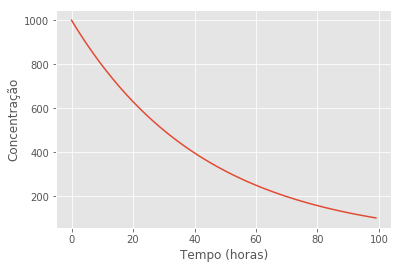

In [110]:
'''
João Zsigmond & André Nadalini

Modelos de concentração de Doxorrubicina no sangue, a partir de um diagrama de estoques e fluxos.

'''

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.integrate import odeint

style.use('ggplot')

# definindo 1a iteração => valores em horas => Apenas um estoque: Sangue
def EqDif(ListaSolucao, t, ke):
    S=ListaSolucao[0]
    dSdt=-S*ke
    return dSdt


def primeira_iteração():
    Dose = 1000
    Ke = math.log(2)/30
    tmax = 100
    delta_t = 1
    tempo = np.arange(0, tmax, delta_t)
    c0=[Dose]

    solucao = odeint(EqDif, c0, tempo, args=(Ke, ))

    plt.plot(tempo, solucao)
    plt.xlabel('Tempo (horas)')
    plt.ylabel('Concentração')
    plt.show()

primeira_iteração()



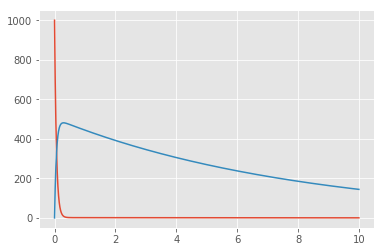

In [111]:
# definindo 2ainteração => valores em dias => Sangue + Tecido (estoques)

def EqDif2(ListaSolucao, t):
   
    kv= 0.05
    kd = math.log(2)/0.0833 #5 minutos em horas
    km= 0.1
    ke = kd
    
    S=ListaSolucao[0]
    T=ListaSolucao[1]

    dsdt=T*kv-S*kd-S*ke 
    dTdt=S*kd-T*kv-T*km
    return dsdt, dTdt


def segunda_iteração():
    tmax=10
    delta_t=1e-3
    tempo=np.arange(0, tmax, delta_t)
    
    C0=[1000, 0]

    Solucao = odeint(EqDif2, C0, tempo)
    # print(Solucao)
    plt.plot(tempo, Solucao[:, 0])
    plt.plot(tempo, Solucao[:, 1])
    plt.show()
    
segunda_iteração()



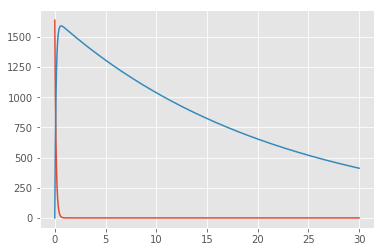

In [112]:
# Terceira iteração: 2 estoques, porem mudanca de parâmetros

def EqDif3(listaSolucao, tempo):
    kd=math.log(2)/0.0833 #5 minutos em horas
#     kd=1.3
    ke=math.log(2)/30
    km=ke
    
    S=listaSolucao[0]
    T=listaSolucao[1]
    
    dsdt=-kd*S
    dTdt=S*kd-T*km-T*ke
    
    return [dsdt, dTdt]


tmax=30
delta_t=1e-3
tempo=np.arange(0, tmax, delta_t)
Dose=1638
c0=[Dose, 0]

solucao=odeint(EqDif3, c0, tempo)
plt.plot(tempo, solucao)
plt.show()


    

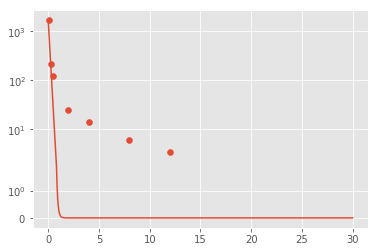

In [113]:
lista_validacao=[0.07265999495416775, 1683.01100786358, 0.23311748381128616, 218.33855652562391, 0.42811089619600295, 124.63848857844486, 1.9799848625010519, 25.11886431509585, 3.993160093067586, 14.339094903163152, 7.980153056933815, 5.941731785042841, 12.004933703361086, 3.391835510002255]
lista_y=lista_validacao[1::2]
lista_x=lista_validacao[0::2]


# print(lista_x)
# print(lista_y)

# Validação da terceira iteração com dados da literatura

plt.scatter(lista_x, lista_y)
plt.plot(tempo, solucao[:, 0])
plt.yscale('symlog')
plt.show()



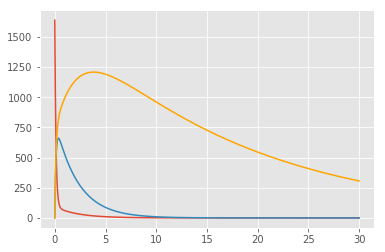

In [118]:
# Nossa ultima iteracao, leva em conta 3 estoques; O Sangue, O Tecido e o rim e o figado.

def eqdif4(listaSolucao, tempo):
    kd=math.log(2)/0.0833/2
    km=math.log(2)/30
    ke=math.log(2)/12
    kv=0.9
    S=listaSolucao[0]
    T=listaSolucao[1]
    RF=listaSolucao[2]
    
    dSdt=-2*kd*S+kv*T
    dTdt=kd*S-km*T-kv*T
    dRFdt=kd*S-ke*RF
    return dSdt, dTdt, dRFdt

tmax=30
delta_t=1e-3
tempo=np.arange(0, tmax, delta_t)


c0=[Dose,0,0]
solucao = odeint(eqdif4, c0, tempo)
plt.plot(tempo, solucao[:, 0])
plt.plot(tempo, solucao[:, 1])
plt.plot(tempo, solucao[:, 2], 'orange')
plt.show()


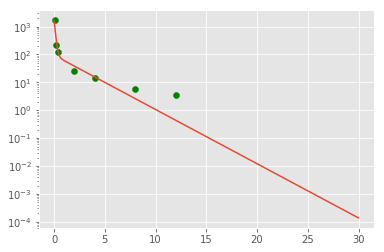

In [116]:
# Validacao da nossa quarta iteração com dados da literatura

plt.scatter(lista_x, lista_y, c='green')
plt.plot(tempo, solucao[:, 0])
plt.yscale('log')

plt.show()

